In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.io as io
import copy
import preprocess_filter
import spoketools

In [2]:
rpjb_list = [
"../data/2023_rpjb/good/074_SPKLFMOV/W1593692401_1_CALIB.rpjb",
"../data/2023_rpjb/good/081_SPKMVLFLP/W1598002720_1_CALIB.rpjb",
"../data/2023_rpjb/good/085_SPKMVLFLP/W1600548784_1_CALIB.rpjb",
"../data/2023_rpjb/good/086_SPKMVLFLP/W1601192344_1_CALIB.rpjb",
"../data/2023_rpjb/good/088_SPKMVLFLP/W1602496766_1_CALIB.rpjb",
"../data/2023_rpjb/good/094_SPKMVLFLP/W1606350447_1_CALIB.rpjb"]

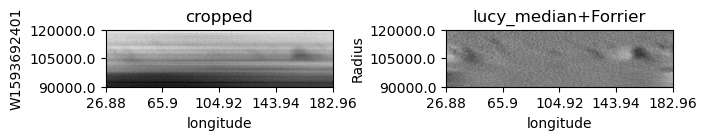

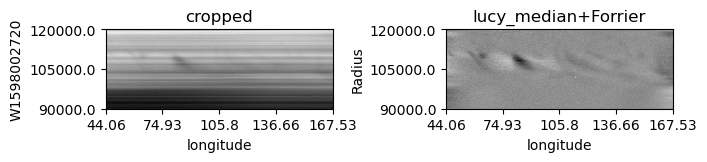

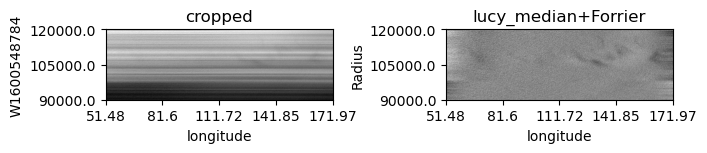

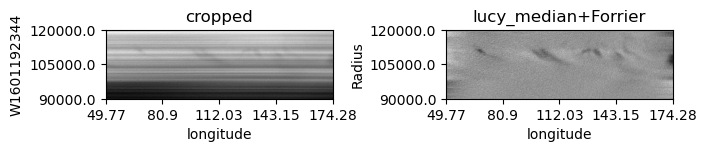

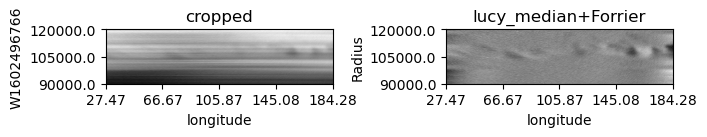

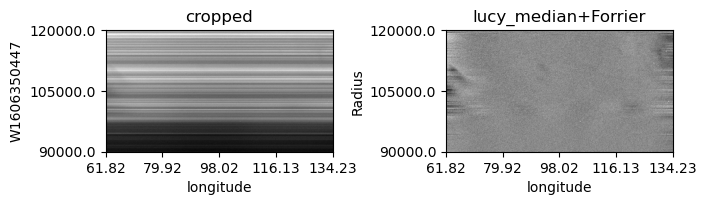

In [10]:



for rpjb_path in rpjb_list:
    idl = io.readsav((rpjb_path))   
    filename, pixel_values = preprocess_filter.apply_filters(rpjb_path)
    fig, axs = plt.subplots(1,2)
    fig.tight_layout()
    fig.subplots_adjust(wspace=.5)


    #cropped
    spoketools.label_figure(idl, pixel_values, axs[0])

    pixel_values = preprocess_filter.apply_lucy_median(pixel_values)
    pixel_values = spoketools.fft2lpf(pixel_values, 0, 3)

    #filters_applied
    spoketools.label_figure(idl, pixel_values, axs[1])
    axs[0].set(ylabel=filename)
    # fig.suptitle(f"{filename}")
    axs[0].set_title('cropped')
    axs[1].set_title('lucy_median+Forrier')
    plt.show()

